# Proyecto shark attacks Ironhack:

-Analisis de mis datos y graficos de apoyo (comprobación hipotesis)

Sergio Molina Biaggini

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
shark2 = pd.read_csv('../work/shark_limpio.csv',encoding = "ISO-8859-1")

In [4]:
shark2.sample(5)
#Compruebo si se ha cargado correctamente mi archivo ya limpio, 

,Year,Type,Country,Activity,Sex,Fatal,Sharks,Month
237,2015,UNPROVOKED,AUSTRALIA,Bodysurfing,Male,NO,Other sharks,feb
1090,2000,UNPROVOKED,USA,Surfing / Wading,Male,NO,Other sharks,aug
1925,1961,UNPROVOKED,AUSTRALIA,Standing,Male,NO,Other sharks,dec
244,2015,UNPROVOKED,SOUTH AFRICA,Surfing,Male,NO,Other sharks,jan
2170,1944,UNPROVOKED,SOUTH AFRICA,Swimming,Male,YES,White shark,jul


## Muestra de graficos 

### 1 -Ataques por sexo

In [3]:
#h1-los tiburones son mas agresivos en verano y descansan en invierno(meses) 
#h2-los tiburones blancos tienen mala fama pero no son los peores - salvar 
#h3-que pais mas ataques , o son mas locos 
#h4-typo ataque mas comunes

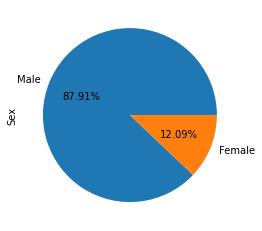

In [4]:
shark2[shark2['Sex'].notnull()].shape[0]
shark3 = shark2['Sex'].value_counts(normalize=True)*100
grafico_sex = shark3.plot.pie(autopct='%1.2f%%')
grafico_sex.figure.savefig("../Figuras/grafico_sex.jpg")
#Ataques por genero 

Podemos observar como practicamente el 88% de los ataques registrados han sido a varones.La cifra es abrumadora, ¿Sera el tiburon un amante de la carne, solo de hombres?. Los datos lo cierto es que no nos aportan por ahora información suficiente para llegar a una conclusión.

### 2-Ataques por actividad

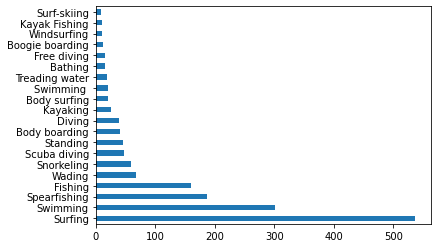

In [5]:
grafico_actividad = shark2['Activity'].value_counts().head(20).plot(kind='barh')
grafico_actividad
grafico_actividad.figure.savefig("../Figuras/grafico_actividad.jpg")

Como se observa claramente en este gráfico.Los surfistas son los más afectados por los ataques de tiburón.Con una clara diferencia con respecto a los nadadores, en segundo lugar y respecto a los percadores, en tercer lugar.Todas estas actividades implican presencia de seres humanos en habitat de tiburones.Los surfistas además suelen adentrarse más profundo que los nadadores, y el uso de la tabla, les puede llegar a parecerse a focas vistas desde la perspectiva submarina de un tiburón.

Sin embargo lo cierto es que aun no llegamos a una conclusión y seguimos con la duda de si los tiburones tienene preferencia por la carne de hombre, como vimo en el punto 1.

### 3-Ataques por meses

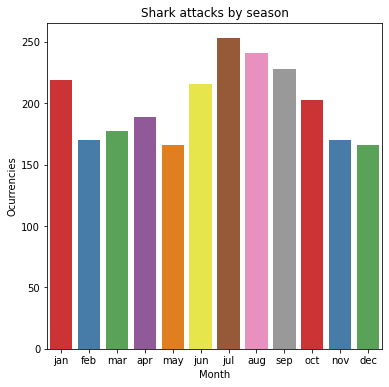

In [6]:
%matplotlib inline
plt.figure(figsize=[6,6])
grafico_meses = sns.countplot(x='Month', data=shark2, palette='Set1',order= ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.xlabel('Month')
plt.ylabel ('Ocurrencies')
plt.title('Shark attacks by season')
grafico_meses.figure.savefig("../Figuras/grafico_meses.jpg")

Continuando con el analisis observamos ahora una grafica del numero de ataques registrados agrupados por meses.Se observa como los meses en los que los ataques son más elevados son los meses comprendidos entre [Junio-Septiembre] con un interesante repunte en enero.Estos datos junto con los anteriormente mostrados me ayudan a sustentar mi hipotesis "Los tiburones no son unos asesinos de humanos".Como hemos visto los surfistas son los más afectados por ataques, estos invaden de manera clara el habitat del tiburón por lo que no es un ataque en si, es mas bien un encontronazo lo que se da entre los surfistas y estos animales.


También hemos visto que los meses de ataque preferidos de los tiburones son los que coinciden con epocas como verano ( periodo de vacaciones para mucha gente) y sorprendentemente enero ( otro momento donde la gente suele tener vacaciones).Esto vendría a apoyar nuestra hipotesis.Ya que vemos como los ataques aumentan cuando la presencia de seres humanos en el habitat de los tiburones es mayor.No son estos quienes deciden buscar y cazar seres humanos. Y en parte podría explicar la preferencia de los tiburones por la carne de hombres, ya que el numero de hombres practicando surf es mayor que el de mujeres.

### 4 - Ataques fatales (yes/no)

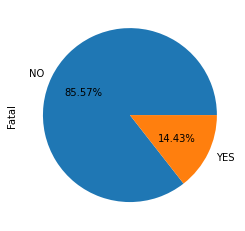

In [7]:
shark2[shark2['Fatal'].notnull()].shape[0]
grafico_fatal = shark2['Fatal'].value_counts(normalize=True)*100
grafico_fatal = grafico_fatal.plot.pie(autopct='%1.2f%%')
grafico_fatal.figure.savefig("../Figuras/grafico_fatal.jpg")

Continuando con el analisis, obtenemos este grafico sobre la fatalidad de los ataques de tiburón.El porcentaje de muertes provocadas por los tiburones a lo largo de los años, es insignificante en comparación con las personas que han sobrevivido.Tan solo un 14,5% de los ataques acabaron con la muerte de una persona.

Esto vendría a apoyar nuestra primera hipótesis ya que no solo no atacan por gusto a las personas, si no que en la mayoría de los casos estos ataques no tienen consecuencias fatales y nuestra segunda hipotesis "los ataques son para defender su habitat y no para comernos".El hecho de que no acaben en muerte la mayoria de los ataques parece indicarnos que los tiburones atacan y se suelen apartar del lugar, no tratan de acabar con su presa y llevarsela con sigo para poder deborarla como hacen cuando realmente si quieren comer.

### 5-DataFrame ataques por paises

In [8]:
attacks_country = shark2['Country'].value_counts().to_frame().reset_index()
attacks_country.columns = ['countries','attacks']
#attacks_by_country['name'].replace('USA','UNITED STATES OF AMERICA',inplace=True)
ataques_per_country = attacks_country.head(8)
ataques_per_country.to_csv("ataques_per_country.csv",index=False) 
ataques_per_country

,countries,attacks
0,USA,1014
1,AUSTRALIA,561
2,SOUTH AFRICA,297
3,BAHAMAS,58
4,NEW ZEALAND,50
5,PAPUA NEW GUINEA,28
6,BRAZIL,28
7,REUNION,26


### 6-Grafico ataques por paises

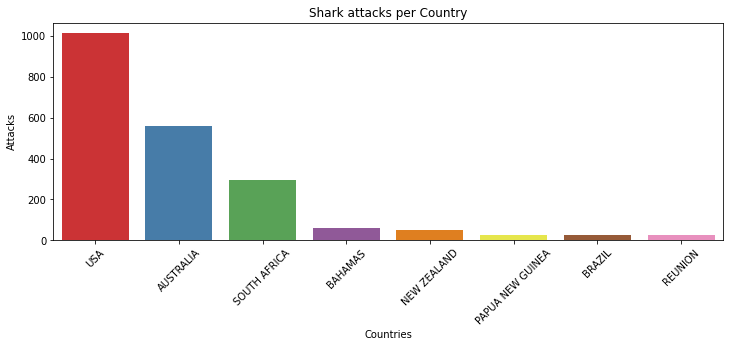

In [9]:
plt.figure(figsize=(12,4))
grafico_ataques_per = sns.barplot(x='countries',y='attacks', data=attacks_country.head(8), palette='Set1');
plt.xlabel('Countries')
plt.ylabel ('Attacks')
plt.title('Shark attacks per Country')
plt.xticks(rotation=45);
grafico_ataques_per.figure.savefig("../Figuras/grafico_ataques_per.jpg")

Ahora tenemos una imagen de un dataframe real de pandas generado a partir de los datos originales donde se observan los ataques por pais.Y tambien un grafico donde se viene a ver lo mismo que en el dataframe de manera más visual.Se observa como USA esta a la cabeza.Siendo el lugar donde más gente hay con respecto a los otros paises donde se han registrado el resto de ataques.

### 7-Ataques a lo largo del tiempo 

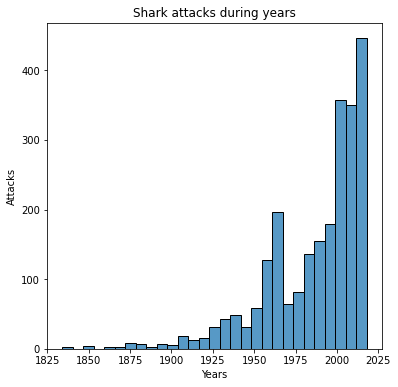

In [10]:
#%matplotlib inline
plt.figure(figsize=(6,6))
histo_years = sns.histplot(x='Year', data=shark2, palette='Set1')
plt.xlabel('Years')
plt.ylabel ('Attacks')
plt.title('Shark attacks during years')
histo_years.figure.savefig("../Figuras/histo_years.jpg")


En este grafico donde se registran los ataques por año de los tiburones, se observa como aumentan de manera muy importante con el aumento de los años.Esto coincide con el aumento de seres humanos en el mundo y sobre todo con su mayor intromisioón en el habitatd de los tiburones.

### 8-Ataques del tiburón blanco

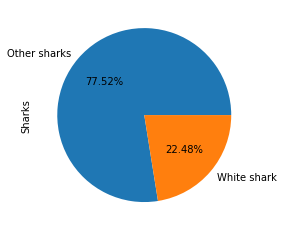

In [3]:
shark2[shark2['Sharks'].notnull()].shape[0]
shark3 = shark2['Sharks'].value_counts(normalize=True)*100
grafico_blanco = shark3.plot.pie(autopct='%1.2f%%')
grafico_blanco.figure.savefig("../Figuras/grafico_blanco.jpg")

Este ultimo grafico viene a responder a mi tercera hipotesis "Son realmente tan agresivos los tiburones blancos".Como se puede observar en este grafico el numero de ataques a manos de tiburones blancos representa un 22 % del total de los ataques. Esto me recuerda al dicho populra " ni los buenos son tan buenos, ni los malos son tan malos".Y vendría a decirnos que ni siquiera este conocido depredador no es en realidad un asesino en serie de personas si no que ataca como respuesta a la presencia humana en su habitat al igual que el resto.

## Conclusión

En conclusión y a la vista de los datos, he de decir que pienso que los tiburones no son unos asesinos de humanos.La mayoría de ataques se producen en momentos y lugares en los que el ser humano esta invadiendo el habitad de los tiburones, y no al revés.También hemos visto como estos ataques en general no acaban en muerte, lo que apoya que estos ataques son fruto de una defensa de su territorio y no un ataque para comer o matar.Por lo tanto creo que debemos aprender a convivir con estos animales y a dejarles su espacio y habitat tranquilos.Y no calificarlos de asesinos sin razon alguna.

